## Precision Recall Curves - Multiclass target Datasets
- Analyzing how Precision and Recall Curves Plots can be drawn for different classes in a multiclass targets datasets
- Plotting micro-average PR curves for multi-class datasets
- How these plots can be use to compare performances between models 
- we'll be using Sklearn and Yellowbrick for performing the above tasks

In [1]:
# import libraries
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# from sklearn
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# for one-vs Rest
from sklearn.multiclass import OneVsRestClassifier

# for converting 1-D target vector into a matrix
from sklearn.preprocessing import label_binarize

# metrics
from sklearn.metrics import (
    precision_recall_curve
)

# from yellowbrick
from yellowbrick.classifier import PrecisionRecallCurve

In [2]:
# load data
data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
# prepare dataframes

df = pd.concat([pd.DataFrame(data.data, columns=data.feature_names),
              pd.DataFrame(data.target, columns=['target'])], axis = 1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [12]:
# check the ratio of the target class
df.target.value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

In [4]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1),
                                                   df['target'],
                                                   test_size=0.3,
                                                   random_state=0)

X_train.shape, X_test.shape

((124, 13), (54, 13))

## Train Models

### Random Forest
- RF model needs to be wrapped under OneVsRestClassifier

In [5]:
# max_depth is set to 1 as we are trying to get a simple model

rf = OneVsRestClassifier(
    RandomForestClassifier(
        n_estimators=10, random_state=39, max_depth=1,n_jobs=2)
    )

rf.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=1,
                                                     n_estimators=10, n_jobs=2,
                                                     random_state=39))

In [6]:
# note that the predictions (here probabilities) are an array of 3 columns

# first column: the probability of an observation of being of class 0
# second column: the probability of an observation of being of class 1
# third column: the probability of an observation of being of class 2

rf_probs = rf.predict_proba(X_test)
rf_probs[:10,:]

array([[0.65585892, 0.30751478, 0.0366263 ],
       [0.05518233, 0.25215179, 0.69266589],
       [0.34795739, 0.5812701 , 0.07077251],
       [0.63193034, 0.32889668, 0.03917297],
       [0.30310868, 0.49998879, 0.19690253],
       [0.37648223, 0.53413382, 0.08938395],
       [0.59288054, 0.31292709, 0.09419236],
       [0.05019807, 0.22826575, 0.72153618],
       [0.18841092, 0.71865205, 0.09293703],
       [0.13170475, 0.67533883, 0.19295642]])

In [7]:
# these probability vectors sum to 1
rf_probs[:10,:].sum(axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [70]:
# get the class predictions for rf
# which is the one with the highest probability
rf_preds = rf.predict(X_test)

In [71]:
rf_preds[:10]

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1])

## Logistic Regression Model

In [8]:
# Logistic Regression has hyper parameter to set for One Vs Rest
log = LogisticRegression(max_iter=10,
                         multi_class='ovr',
                         random_state=0)

log.fit(X_train, y_train)

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

LogisticRegression(max_iter=10, multi_class='ovr', random_state=0)

In [9]:
log_probs = log.predict_proba(X_test)
log_probs[:10, :]

array([[8.03835946e-01, 6.55703628e-02, 1.30593691e-01],
       [1.12186161e-04, 6.18682106e-01, 3.81205708e-01],
       [1.89065726e-03, 5.97109910e-01, 4.00999433e-01],
       [8.38327387e-01, 4.50373337e-02, 1.16635279e-01],
       [5.29907169e-04, 6.02840121e-01, 3.96629972e-01],
       [1.44386555e-05, 6.27677859e-01, 3.72307703e-01],
       [8.98500309e-01, 1.82105291e-02, 8.32891616e-02],
       [8.63968121e-03, 5.62918752e-01, 4.28441566e-01],
       [3.51523966e-02, 5.31592415e-01, 4.33255189e-01],
       [1.77044639e-02, 5.57176456e-01, 4.25119080e-01]])

In [29]:
# class predictions
log_preds = log.predict(X_test)
log_preds[:10]

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

## Precision Recall Curve

### Per Class - sklearn

In [31]:
# first we need to binarize our target labels into multi index matrix
y_test[:10]

54     0
151    2
63     1
55     0
123    1
121    1
7      0
160    2
106    1
90     1
Name: target, dtype: int32

In [10]:
# we have 3 classes so specify the class values
# so now we have one class per column
y_test = label_binarize(y_test, classes=[0,1,2])
y_test[:10,:]

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [34]:
y_test[:,2]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [72]:
# get the precision, recall and thresholds values
# this we are considering for class 2
# here we are treating the problem as class 2 vs Rest
p,r,threshold = precision_recall_curve(y_test[:,2], rf_probs[:,2])
# precision values
p

array([0.92857143, 0.92307692, 0.91666667, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [73]:
# recall values
r

array([1.        , 0.92307692, 0.84615385, 0.84615385, 0.76923077,
       0.69230769, 0.61538462, 0.53846154, 0.46153846, 0.38461538,
       0.30769231, 0.23076923, 0.15384615, 0.07692308, 0.        ])

In [74]:
# thresholds examined
threshold

array([0.52316703, 0.54415106, 0.54937457, 0.56716779, 0.5910435 ,
       0.61409803, 0.6341882 , 0.67254717, 0.69266589, 0.7084845 ,
       0.72153618, 0.75113934, 0.7669628 , 0.7853098 ])

In [75]:
y_test[:,0]

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [76]:
# for class 0
p,r,threshold = precision_recall_curve(y_test[:,0], rf_probs[:,0])
p

array([0.95      , 0.94736842, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [77]:
r

array([1.        , 0.94736842, 0.94736842, 0.89473684, 0.84210526,
       0.78947368, 0.73684211, 0.68421053, 0.63157895, 0.57894737,
       0.52631579, 0.47368421, 0.42105263, 0.36842105, 0.31578947,
       0.21052632, 0.15789474, 0.05263158, 0.        ])

In [78]:
threshold

array([0.41642178, 0.42327198, 0.44236274, 0.54042436, 0.55023138,
       0.56460202, 0.58034038, 0.58488937, 0.5857439 , 0.59288054,
       0.5992422 , 0.60886483, 0.60962758, 0.62403154, 0.63193034,
       0.65216469, 0.65585892, 0.67049232])

In [79]:
# for class 1
p,r,threshold = precision_recall_curve(y_test[:,1], rf_probs[:,1])
p

array([0.52380952, 0.51219512, 0.53846154, 0.55263158, 0.56756757,
       0.58333333, 0.6       , 0.63636364, 0.65625   , 0.67741935,
       0.7       , 0.72413793, 0.75      , 0.77777778, 0.80769231,
       0.84      , 0.875     , 0.91304348, 0.90909091, 0.95238095,
       0.95      , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [80]:
r

array([1.        , 0.95454545, 0.95454545, 0.95454545, 0.95454545,
       0.95454545, 0.95454545, 0.95454545, 0.95454545, 0.95454545,
       0.95454545, 0.95454545, 0.95454545, 0.95454545, 0.95454545,
       0.95454545, 0.95454545, 0.95454545, 0.90909091, 0.90909091,
       0.86363636, 0.86363636, 0.81818182, 0.77272727, 0.72727273,
       0.68181818, 0.63636364, 0.59090909, 0.54545455, 0.5       ,
       0.45454545, 0.40909091, 0.36363636, 0.31818182, 0.27272727,
       0.22727273, 0.18181818, 0.13636364, 0.09090909, 0.04545455,
       0.        ])

In [81]:
threshold

array([0.30677854, 0.30751478, 0.31081584, 0.31292709, 0.31834415,
       0.32611392, 0.32889668, 0.33623524, 0.34111956, 0.34255433,
       0.34950738, 0.35339526, 0.35479745, 0.35848695, 0.36361114,
       0.38076094, 0.40190058, 0.42117747, 0.45261204, 0.48169245,
       0.4926667 , 0.49998879, 0.50031035, 0.52592483, 0.53413382,
       0.55479235, 0.5812701 , 0.59164533, 0.61596739, 0.65099676,
       0.67533883, 0.67853808, 0.68938168, 0.70225678, 0.71865205,
       0.734811  , 0.7700388 , 0.77041466, 0.80683544, 0.83800877])

In [44]:
y_test.shape

(54, 3)

## Precision recall for all classes

In [11]:
# Now lets get the above precision and recall values for all classes into a dicationary 
# this will help in plotting the graph

precision_rf = dict()
recall_rf = dict()

for i in range(3):
    precision_rf[i], recall_rf[i], _ = precision_recall_curve(y_test[:,i], rf_probs[:,i])
    
precision_rf

{0: array([0.95      , 0.94736842, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ]),
 1: array([0.52380952, 0.51219512, 0.53846154, 0.55263158, 0.56756757,
        0.58333333, 0.6       , 0.63636364, 0.65625   , 0.67741935,
        0.7       , 0.72413793, 0.75      , 0.77777778, 0.80769231,
        0.84      , 0.875     , 0.91304348, 0.90909091, 0.95238095,
        0.95      , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]),
 2: array([0.92857143, 0.92307692, 0.91666667, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.     

In [12]:
recall_rf

{0: array([1.        , 0.94736842, 0.94736842, 0.89473684, 0.84210526,
        0.78947368, 0.73684211, 0.68421053, 0.63157895, 0.57894737,
        0.52631579, 0.47368421, 0.42105263, 0.36842105, 0.31578947,
        0.21052632, 0.15789474, 0.05263158, 0.        ]),
 1: array([1.        , 0.95454545, 0.95454545, 0.95454545, 0.95454545,
        0.95454545, 0.95454545, 0.95454545, 0.95454545, 0.95454545,
        0.95454545, 0.95454545, 0.95454545, 0.95454545, 0.95454545,
        0.95454545, 0.95454545, 0.95454545, 0.90909091, 0.90909091,
        0.86363636, 0.86363636, 0.81818182, 0.77272727, 0.72727273,
        0.68181818, 0.63636364, 0.59090909, 0.54545455, 0.5       ,
        0.45454545, 0.40909091, 0.36363636, 0.31818182, 0.27272727,
        0.22727273, 0.18181818, 0.13636364, 0.09090909, 0.04545455,
        0.        ]),
 2: array([1.        , 0.92307692, 0.84615385, 0.84615385, 0.76923077,
        0.69230769, 0.61538462, 0.53846154, 0.46153846, 0.38461538,
        0.30769231, 0.23076

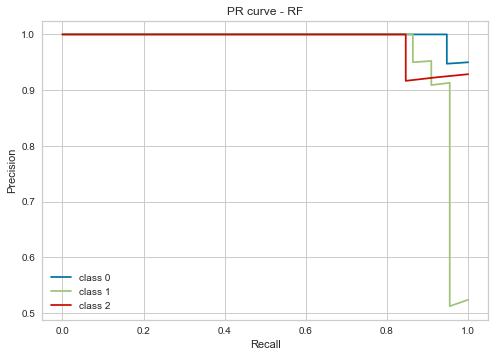

In [13]:
# plot the curves for each class

for i in range(3):
    plt.plot(recall_rf[i], precision_rf[i], label = 'class {}'.format(i))
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve - RF')
plt.legend(loc='best')
plt.show()

In [14]:
# lets do the same for Logistic Regression
# Now lets get the above precision and recall values for all classes into a dicationary 
# this will help in plotting the graph

precision_log = dict()
recall_log = dict()

for i in range(3):
    precision_log[i], recall_log[i], _ = precision_recall_curve(y_test[:,i], log_probs[:,i])
    
precision_log

{0: array([0.54285714, 0.52941176, 0.54545455, 0.5625    , 0.58064516,
        0.6       , 0.62068966, 0.64285714, 0.66666667, 0.69230769,
        0.72      , 0.75      , 0.73913043, 0.77272727, 0.80952381,
        0.85      , 0.84210526, 0.88888889, 0.94117647, 0.9375    ,
        0.93333333, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]),
 1: array([0.55      , 0.53846154, 0.55263158, 0.56756757, 0.58333333,
        0.6       , 0.61764706, 0.60606061, 0.59375   , 0.61290323,
        0.63333333, 0.65517241, 0.64285714, 0.62962963, 0.65384615,
        0.64      , 0.66666667, 0.69565217, 0.72727273, 0.71428571,
        0.7       , 0.73684211, 0.72222222, 0.70588235, 0.75      ,
        0.8       , 0.78571429, 0.84615385, 0.83333333, 0.81818182,
        0.8       , 0.77777778, 0.875     , 0.85714286, 0.83333333,
        0.8       , 

In [15]:
recall_log

{0: array([1.        , 0.94736842, 0.94736842, 0.94736842, 0.94736842,
        0.94736842, 0.94736842, 0.94736842, 0.94736842, 0.94736842,
        0.94736842, 0.94736842, 0.89473684, 0.89473684, 0.89473684,
        0.89473684, 0.84210526, 0.84210526, 0.84210526, 0.78947368,
        0.73684211, 0.73684211, 0.68421053, 0.63157895, 0.57894737,
        0.52631579, 0.47368421, 0.42105263, 0.36842105, 0.31578947,
        0.26315789, 0.21052632, 0.15789474, 0.10526316, 0.05263158,
        0.        ]),
 1: array([1.        , 0.95454545, 0.95454545, 0.95454545, 0.95454545,
        0.95454545, 0.95454545, 0.90909091, 0.86363636, 0.86363636,
        0.86363636, 0.86363636, 0.81818182, 0.77272727, 0.77272727,
        0.72727273, 0.72727273, 0.72727273, 0.72727273, 0.68181818,
        0.63636364, 0.63636364, 0.59090909, 0.54545455, 0.54545455,
        0.54545455, 0.5       , 0.5       , 0.45454545, 0.40909091,
        0.36363636, 0.31818182, 0.31818182, 0.27272727, 0.22727273,
        0.18181818, 

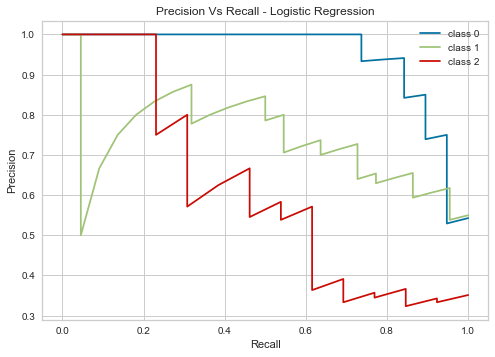

In [16]:
# plotting

for i in range(3):
    plt.plot(recall_log[i], precision_log[i], label = 'class {}'.format(i))
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Vs Recall - Logistic Regression')
plt.legend(loc='best')
plt.show()

## Compare PR for each class

### Random Forest

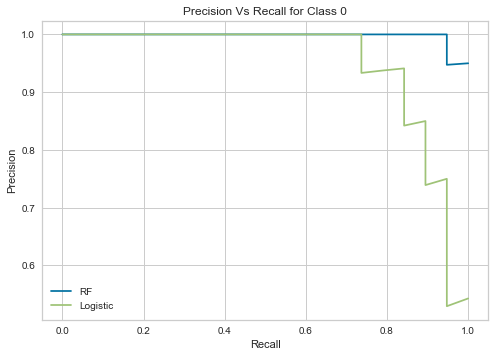

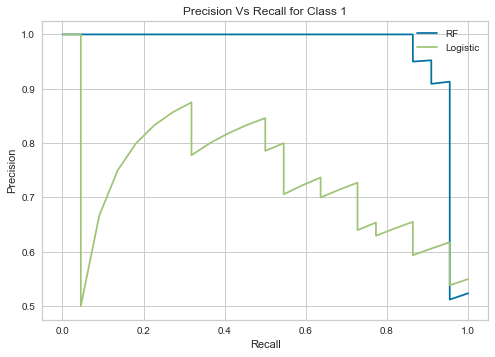

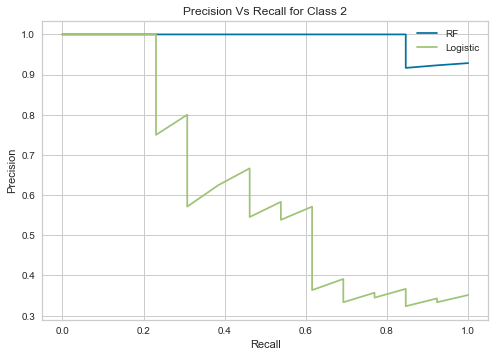

In [19]:
for i in range(3):
    # get the precision and recall values
    p_rf, r_rf, _ = precision_recall_curve(y_test[:,i], rf_probs[:,i])
    p_log, r_log, _ = precision_recall_curve(y_test[:,i], log_probs[:,i])
    
    # plot the PR plot
    plt.plot(r_rf, p_rf, label = 'RF')
    plt.plot(r_log, p_log, label ='Logistic')
    plt.legend(loc='best')
    plt.title('Precision Vs Recall for Class {}'.format(i))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

- So, we can see the RF is doing better for all classes than the Logistic model as per the above PR plots

## Micro-Average using SKLEARN
- In order to do this, we will need to stack the proabability vectors of all the classes on top of one another
- We can do this stacking using ravel

In [21]:
vec_1 = np.array([[1,2,3],
           [4,5,6],
           [7,8,9]])
test_ravel = vec_1.ravel()
test_ravel

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
# probability vector for all classes into a 1-D vector
rf_probs.ravel()

array([0.65585892, 0.30751478, 0.0366263 , 0.05518233, 0.25215179,
       0.69266589, 0.34795739, 0.5812701 , 0.07077251, 0.63193034,
       0.32889668, 0.03917297, 0.30310868, 0.49998879, 0.19690253,
       0.37648223, 0.53413382, 0.08938395, 0.59288054, 0.31292709,
       0.09419236, 0.05019807, 0.22826575, 0.72153618, 0.18841092,
       0.71865205, 0.09293703, 0.13170475, 0.67533883, 0.19295642,
       0.14215091, 0.29068131, 0.56716779, 0.03969788, 0.32611392,
       0.6341882 , 0.67049232, 0.29443878, 0.03506889, 0.42327198,
       0.50031035, 0.07641767, 0.0591323 , 0.26832053, 0.67254717,
       0.15374694, 0.77041466, 0.07583841, 0.58034038, 0.38076094,
       0.03889868, 0.62403154, 0.34111956, 0.0348489 , 0.1354814 ,
       0.42117747, 0.44334113, 0.65216469, 0.31081584, 0.03701947,
       0.40973074, 0.52592483, 0.06434443, 0.55023138, 0.40190058,
       0.04786804, 0.44236274, 0.45261204, 0.10502522, 0.13095529,
       0.7700388 , 0.09900591, 0.14384689, 0.30677854, 0.54937

In [24]:
# lets check the length of the original and the ravelled vectors
# the ravelled vector is 3 times the size the original vector - the number of classes times
len(rf_probs), len(rf_probs.ravel())

(54, 162)

In [25]:
# now lets get the precision and recall values for these ravelled vectors and plot

# for random forest
p_rf_micro, r_rf_micro, _ = precision_recall_curve(y_test.ravel(), rf_probs.ravel())

# for logistic model
p_log_micro, r_log_micro, _ = precision_recall_curve(y_test.ravel(), log_probs.ravel())

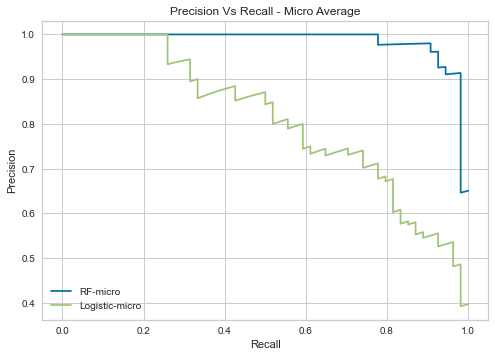

In [26]:
# plot

plt.plot(r_rf_micro, p_rf_micro, label='RF-micro')
plt.plot(r_log_micro, p_log_micro, label='Logistic-micro')

plt.title('Precision Vs Recall - Micro Average')
plt.legend(loc='best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## Using YELLOWBRICK

### Per class

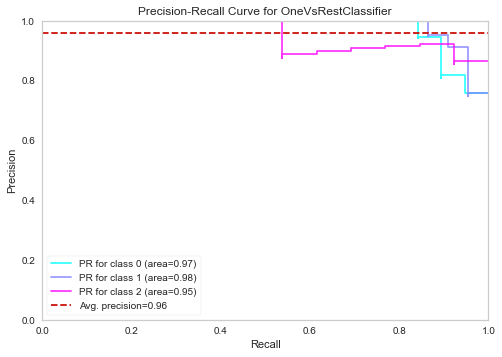

<AxesSubplot:title={'center':'Precision-Recall Curve for OneVsRestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [30]:
# For Random Forest

viz_rf = PrecisionRecallCurve(rf,
                              per_class=True,
                              cmap = "cool",
                              micro=False)

viz_rf.fit(X_train,y_train)   # fits the model
viz_rf.score(X_test, y_test)  # evaluate the model on test data
viz_rf.show()                 # plot the data

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

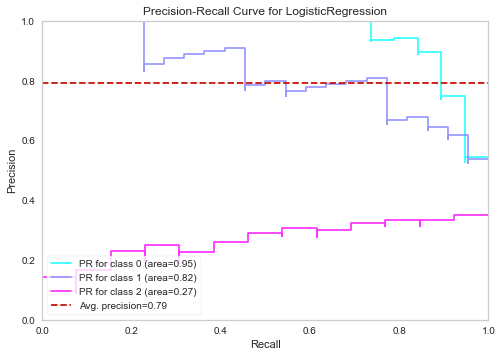

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [31]:
# For Logistic Regression

viz_log = PrecisionRecallCurve(log,
                              per_class=True,
                              cmap = "cool",
                              micro=False)

viz_log.fit(X_train,y_train)   # fits the model
viz_log.score(X_test, y_test)  # evaluate the model on test data
viz_log.show()                 # plot the data

### Micro Average

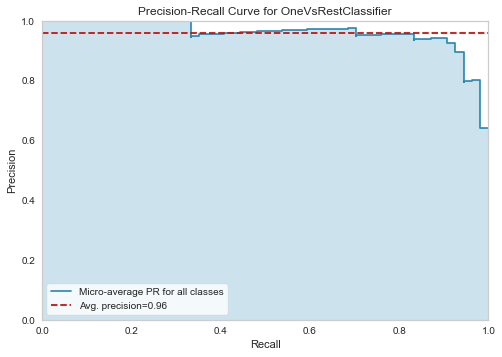

<AxesSubplot:title={'center':'Precision-Recall Curve for OneVsRestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [32]:
# for Random Forest model
viz_rf_micro = PrecisionRecallCurve(rf, 
                                    cmap="cool",
                                   micro=True)
viz_rf_micro.fit(X_train, y_train)
viz_rf_micro.score(X_test, y_test)
viz_rf_micro.show()

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

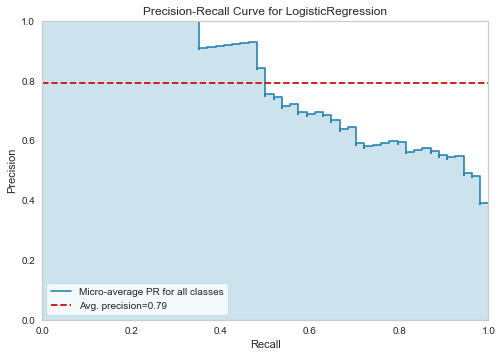

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [33]:
# for Logistic Regression model
viz_log_micro = PrecisionRecallCurve(log, 
                                    cmap="cool",
                                   micro=True)
viz_log_micro.fit(X_train, y_train)
viz_log_micro.score(X_test, y_test)
viz_log_micro.show()